# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Можем увидеть, что у нас много пропущенных значений, а так же нужно поменять типа данных у некоторых столбцов, сделаем это ниже в предобработке данных**

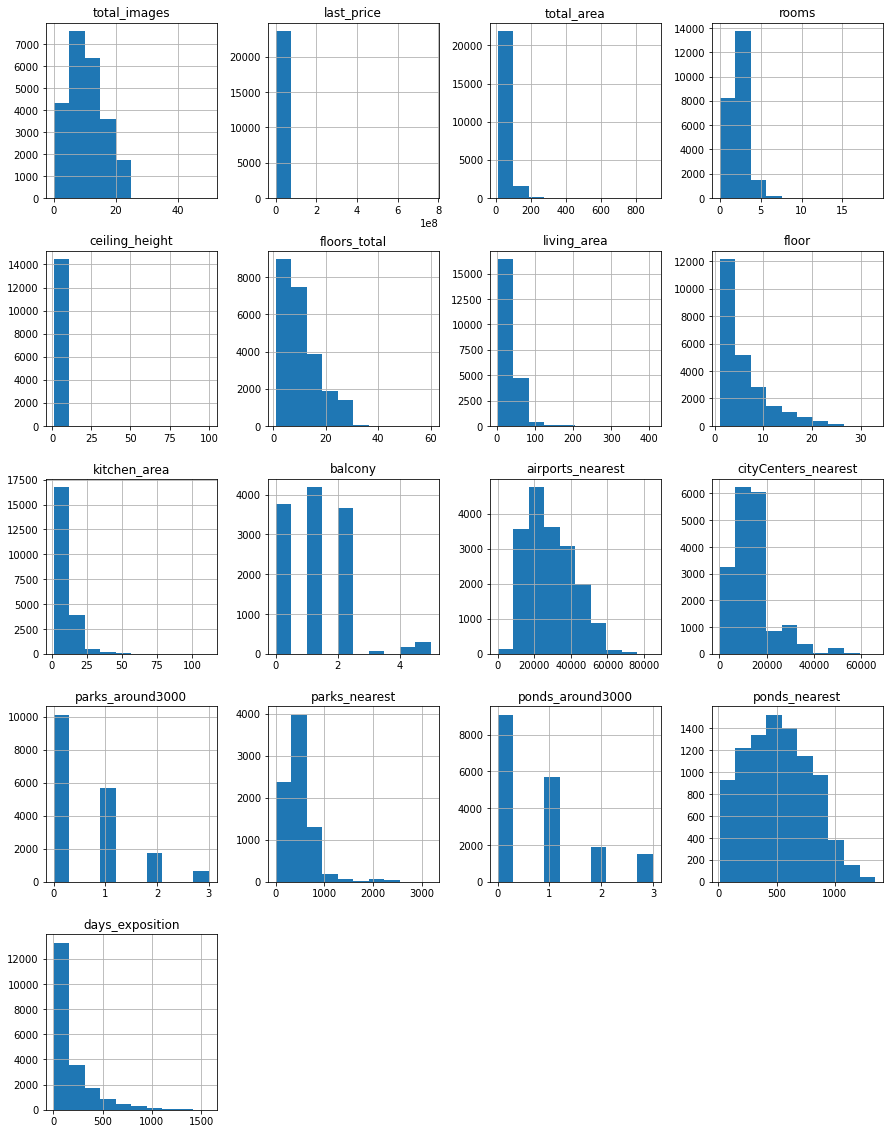

In [4]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#пропуски в балконах скорее всего обусловлены их отсутствием, поэтому меняем пропуски на нули
data['balcony'] = data['balcony'].fillna(0)
#сложно объяснить причину возникновения таких пропусков, но скорее всего при выставление объявления можно пропустить этот пункт
data['is_apartment'] = data['is_apartment'].fillna(False)
#заполним пропущенные данные о высоте потолка медианным значием
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#так как всего 49 строк с неизвестным населенным пунктом и вряд ли они повлияют на результат для удобства заполним пустые
# сторокой 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')
# к сожалению заполнить пропсуки в floors_total, living_area, а так же других мы пока не можем

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# как мы заметили из info() нам нужно поменять типы данных у  некоторых столбцов, например количество балконов имеет
# вещественный тип, изменим на int
data['balcony'] = data['balcony'].astype('int')
#так же цена у нас задана вещественным типом данных, меняем на int
data['last_price'] = data['last_price'].astype('int')

# теперь разберемся с датой. first_day_exposition задан типом object, изменим на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [10]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [11]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [12]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок Рябово'], 'поселок городского типа Рябово', regex=True)
    .replace(['поселок Мурино'], 'Мурино', regex=True)
    .replace(['деревня Кудрово'], 'Кудрово', regex=True)
) 

In [13]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
Мурино                 590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

In [14]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Лесогорский', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Свирьстрой', 'городской поселок Советский',
       'гор

### Посчитайте и добавьте в таблицу новые столбцы

In [15]:
data['price_per_square'] = round(data['last_price'] / data['total_area'], 2)
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [16]:
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [17]:
data['floor_type'] = data.apply(type_of_floor, axis=1)

In [18]:
data['km_to_center'] = round(data['cityCenters_nearest'] / 1000)

In [19]:
data['km_to_center']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: km_to_center, Length: 23699, dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

<AxesSubplot:>

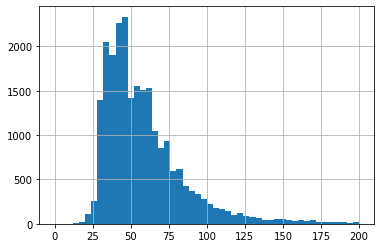

In [21]:
data['total_area'].hist(bins=50, range=(0,200))

In [22]:
data['total_area'].describe()
#есть вбросы, но не критичные

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

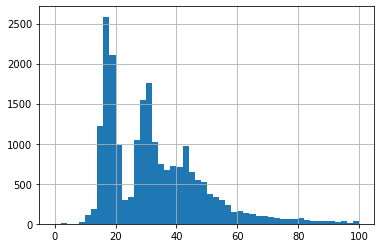

In [23]:
data['living_area'].hist(bins=50, range=(0,100))

In [24]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

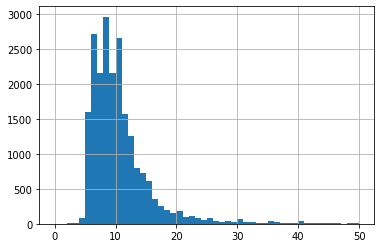

In [25]:
data['kitchen_area'].hist(bins=50, range=(0,50))

In [26]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

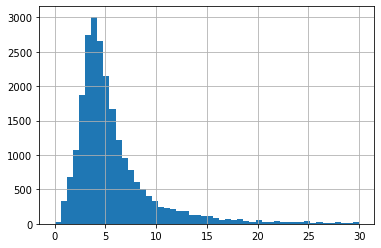

In [27]:
(data['last_price']/1000000).hist(bins=50, range=(0,30))

In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

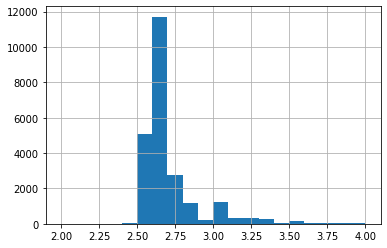

In [29]:
data['ceiling_height'].hist(bins=20, range=(2,4))

In [30]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

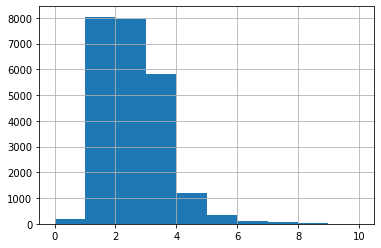

In [31]:
data['rooms'].hist(bins=10, range=(0,10))

In [32]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

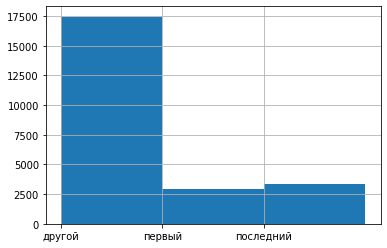

In [33]:
data['floor_type'].hist(bins=3, range=(0,3))

<AxesSubplot:>

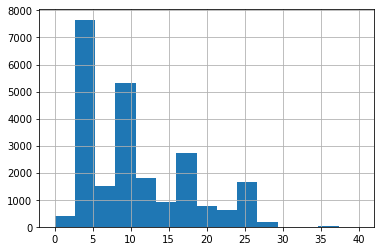

In [34]:
data['floors_total'].hist(bins=15, range=(0,40))

In [35]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

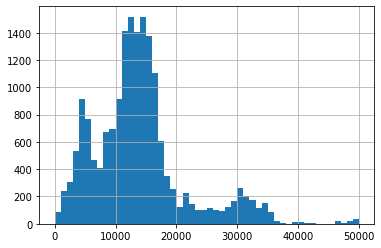

In [36]:
data['cityCenters_nearest'].hist(bins=50, range=(0,50000))

In [37]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

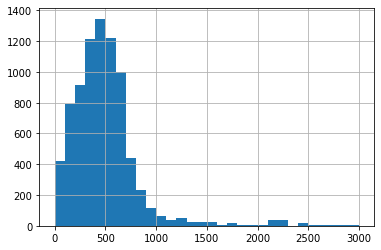

In [38]:
data['parks_nearest'].hist(bins=30, range=(0,3000))

In [39]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-info">
<h2> Вывод о параметрах </h2>
    
total_area - средняя площадь квартиры около 60 квадратных метров, медианная - 52. <br>
living_area - средняя жилая площадь - 34, медианная - 30. <br>
kitchen_area - средняя площадь кухни - 10, медианная - 9.1. <br>
last_price - средняя цена квартиры - 6.5 миллионов, мелианная - 4.6 <br>
ceiling_height - средняя высота потолков 2,69, медианная - 2.65 <br>
rooms - среднее количество комнат около 2, медианное - 2. <br>
floor_type - как и ожидалось больше всего квартир на других этажах, а на последнем и первом количство сопостовимое. <br>
floors_total - среднее количество этажей в доме - 10.6, медианное - 9. <br>
cityCenters_nearest - среднее расстояние от квартиры до центра - 14191 метр, медианное - 13098. <br>
parks_nearest - среднее расстояние от квартиры до парка - 490, медианное - 455.

</div>

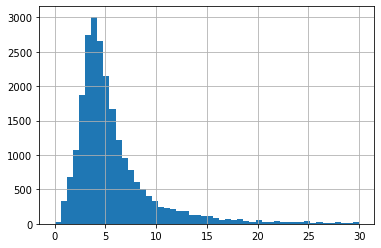

In [40]:
(data['last_price']/1000000).hist(bins=50, range=(0,30))
data = data.query('last_price < 25000000')

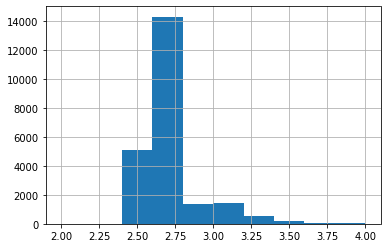

In [41]:
data['ceiling_height'].hist(bins=10, range=(2,4))
data = data.query('ceiling_height > 2 and ceiling_height < 4')

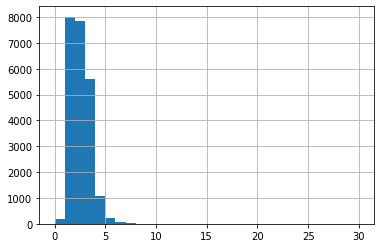

In [42]:
data['rooms'].hist(bins=30, range=(0,30))
data['rooms'].describe()
data = data.query('rooms > 0')

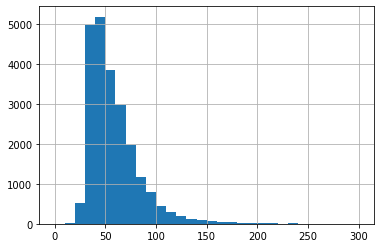

In [43]:
data['total_area'].hist(bins=30, range=(0,300))
data['total_area'].describe()
data = data.query('total_area < 400')

<AxesSubplot:>

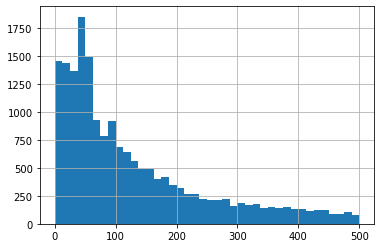

In [44]:
data[data['days_exposition']!=0]['days_exposition'].hist(bins=40, range=(0,500))

In [45]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    19896.000000
mean       179.072527
std        217.422798
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">
<h2> Вывод о времени продажи </h2>
    Среднее количество дней, которое квартира висела на продаже, 180 дней, а медиана 95. <br>
    Квартиры проданные за менее 45 дней мы можем считать быстро проданными, а за срок более 232 дней - необычно долгими

</div>

<AxesSubplot:xlabel='total_area'>

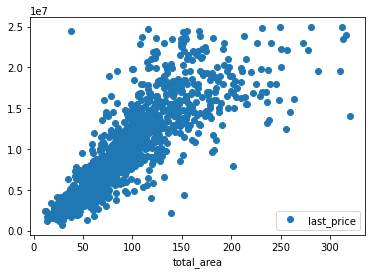

In [46]:
pivot_table_total_area = data.pivot_table(index='total_area', values='last_price')
pivot_table_total_area.plot(style='o')

In [47]:
data['total_area'].corr(data['last_price'])

0.783230714558558

**Как и ожидалось видим достаточно сильную зависимость от цены и общей площади квартиры**

<AxesSubplot:xlabel='living_area'>

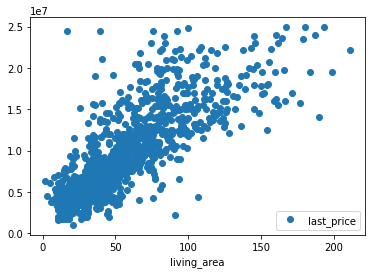

In [48]:
pivot_table_living_area = data.pivot_table(index='living_area', values='last_price')
pivot_table_living_area.plot(style='o')

In [49]:
data['living_area'].corr(data['last_price'])

0.6783417022099887

**С жилой площадью наблюдаем среднюю зависимость**

<AxesSubplot:xlabel='kitchen_area'>

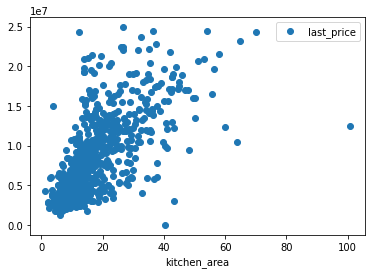

In [50]:
pivot_table_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price')
pivot_table_kitchen_area.plot(style='o')

In [51]:
data['kitchen_area'].corr(data['last_price'])

0.5937863819665491

**Примерно такая же зависимость, как и от жилой площади**

<AxesSubplot:xlabel='rooms'>

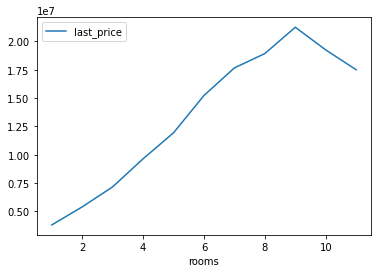

In [52]:
pivot_table_rooms = data.pivot_table(index='rooms', values='last_price')
pivot_table_rooms.plot()

In [53]:
data['rooms'].corr(data['last_price'])

0.5172180469913893

**Средняя
зависимость от количества комнат и цены, сама зависимость скорее связана с тем, что у квартир с большей площадью - больше комнат**

<AxesSubplot:xlabel='floor_type'>

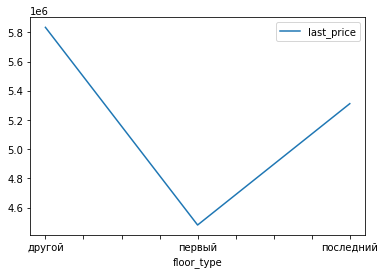

In [54]:
pivot_table_floor_type = data.pivot_table(index='floor_type', values='last_price')
pivot_table_floor_type.plot()

In [55]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_type,,,
другой,16854,5.834316e+06,4800000
первый,2860,4.480079e+06,3900000
последний,3195,5.311418e+06,4250000


**В следнем квартиры на последнем этаже стоят дороже, а на первом дешевле**

<AxesSubplot:xlabel='exposition_day'>

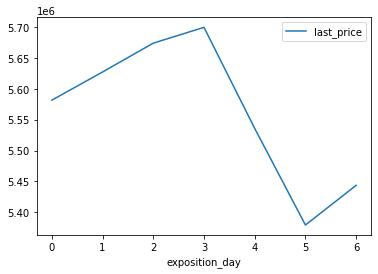

In [56]:
pivot_table_exposition_day = data.pivot_table(index='exposition_day', values='last_price')
pivot_table_exposition_day.plot()

**Какая-либо зависимость отсутсвует**

<AxesSubplot:xlabel='exposition_month'>

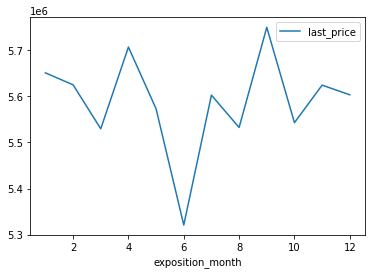

In [57]:
pivot_table_exposition_month = data.pivot_table(index='exposition_month', values='last_price')
pivot_table_exposition_month.plot()

**Зависимость отсутствует, однако мы видим, что в среднем самый дорогие квартиры выставляют в декабре**

<AxesSubplot:xlabel='exposition_year'>

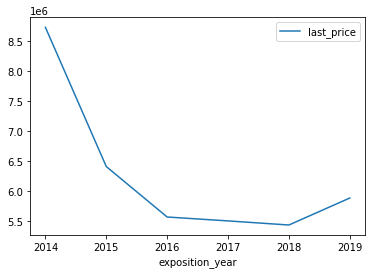

In [58]:
pivot_table_exposition_year = data.pivot_table(index='exposition_year', values='last_price')
pivot_table_exposition_year.plot()

**В среднем цена с 2014 года начала падать, но к концу 2018 снова пошла вверх**

In [59]:
pivot_table_locality_name = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean'])
pivot_table_locality_name.columns = ['count', 'mean']
pivot_table_locality_name.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15060,109369.017220
Мурино,561,85478.554082
Кудрово,450,95151.880622
поселок Шушары,436,78405.738532
Всеволожск,389,68579.740283
Пушкин,361,102080.093490
Колпино,337,75333.295816
поселок Парголово,323,90289.778019
Гатчина,305,68811.372590


**Самая большая средняя стоимость квадратного метра в Санкт-Петербурге(114849 рублей), самая маленькая в Выборге(58141 рубль)**

<AxesSubplot:xlabel='km_to_center'>

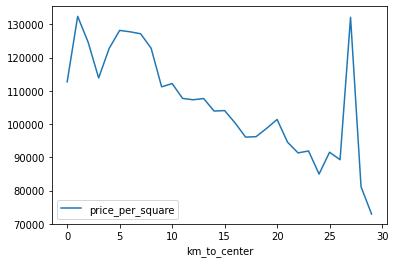

In [60]:
pivot_table_km_to_center = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='price_per_square', aggfunc='mean') 
pivot_table_km_to_center.plot()

**Чем ближе квартира к центру, тем больше ее стоимость. Подскоки на графики можно объяснить дорогими ЖК на окраине города**

### Общий вывод

Были проанализированы следующие параметры:

total_area - средняя площадь квартиры около 60 квадратных метров, медианная - 52.
living_area - средняя жилая площадь - 34, медианная - 30.
kitchen_area - средняя площадь кухни - 10, медианная - 9.1.
last_price - средняя цена квартиры - 6.5 миллионов, мелианная - 4.6
ceiling_height - средняя высота потолков 2,69, медианная - 2.65
rooms - среднее количество комнат около 2, медианное - 2.
floor_type - как и ожидалось больше всего квартир на других этажах, а на последнем и первом количство сопостовимое.
floors_total - среднее количество этажей в доме - 10.6, медианное - 9.
cityCenters_nearest - среднее расстояние от квартиры до центра - 14191 метр, медианное - 13098.
parks_nearest - среднее расстояние от квартиры до парка - 490, медианное - 455.

По результатам анализа о времени продажи квартиры можно сделать следующий вывод:

Среднее количество дней, которое квартира висела на продаже, 180 дней, а медиана 95.
Квартиры проданные за менее 45 дней мы можем считать быстро проданными, а за срок более 232 дней - необычно долгими.

Больше всего на стоимость объекта влияет площадь квартиры. Также мы можем заметить, что квартиры на последнем этаже ценятся выше. Что касается зависимости от даты продажи(дня, месяца, года), то можем заметить следующие: дорогие квартиры чаще всего выставляют на продажу по субботам, от месяца как таковой зависимости нет, в году можно увидеть, что средняя цена упала практически в 2 раза, но к концу 2018 года снова пошла вверх.

Также были проанализорванны топ-10 населенных пунктов по количеству объявлений. Таким образом самым дорогим квадратным метром может похвастаться Санкт-Петербург(114849 рублей), а самым дешевым - Выборг(58141 рублей).

Стоимость квартиры в Санкт-Петербурге напрямую зависит от удаленности от центра. Так, чем ближе квартира находится к центру, тем больше будет ее стоимасть и наоборот. Возможно, на подскоки в графике могут влиять цены в элитных ЖК на окраине города.